<a href="https://colab.research.google.com/github/CodeHunterOfficial/ML_2024/blob/main/Lecture_2_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6">Линейные модели. Регрессия.</font>




<font size="6">Машинное обучение.</font>

<font size="5"> Что это такое?</font>


Машинное обучение - это подраздел искусственного интеллекта, который позволяет компьютерам обучаться и делать прогнозы или принимать решения на основе данных, без явного программирования. Алгоритмы машинного обучения используются для анализа данных, выявления паттернов и принятия решений на основе этих данных.


Говорят, что компьютерная программа обучается на основе опыта Е по отношению к некоторому классу задач Т и некоторой мере эффективности Р. если эффективность программы при решении задач из Т, измеряемая с помощью Р, повышается с опытом Е.
**(Tom Mitchell, Machine Learning, 1997)**


В машинном обучении существуют три основных типа задач: регрессия, классификация и кластеризация.

*   Регрессия - это задача, в которой модель пытается предсказать непрерывное
значение на основе имеющихся данных. Например, предсказание цены недвижимости по характеристикам дома.

*   Классификация - это задача, в которой модель пытается отнести объекты к определенным категориям или классам на основе их признаков. Например, определение, является ли электронное письмо спамом или не спамом.

*   Кластеризация - это задача, в которой модель группирует объекты на основе их сходства без учителя, т.е. без предварительно известных меток классов. Например, кластеризация потребителей для выявления сегментов рынка.

Каждый из этих типов задач в машинном обучении имеет свои методы и подходы для решения.

В датасете для машинного обучения обычно выделяют три основных подмножества данных:

* Обучающая выборка (Training set): Это подмножество данных, которое используется для обучения модели. Модель "учится" на этих данных путем подбора параметров и поиска закономерностей в данных.
* Валидационная выборка (Validation set): Это подмножество данных, которое используется для настройки гиперпараметров модели и оценки ее производительности во время обучения. Валидационная выборка помогает выбирать лучшую модель из нескольких вариантов и предотвращает переобучение.
* Тестовая выборка (Test set): Это отдельное подмножество данных, которое не используется ни во время обучения, ни во время настройки гиперпараметров. Она используется для окончательной оценки производительности модели после завершения обучения. Тестовая выборка позволяет оценить, насколько хорошо модель будет работать на новых, ранее не виденных данных.

Разделение датасета на эти три части помогает оценить производительность модели и ее способность обобщаться на новые данные.

Обычно применяют следующее соотношение для разделения датасета на обучающую, валидационную и тестовую выборки:

* Обучающая выборка: Примерно 60-80% от всего датасета.
* Валидационная выборка: Обычно отводят 10-20% от всего датасета.
* Тестовая выборка: Около 10-20% от всего датасета.

Эти процентные соотношения могут варьироваться в зависимости от размера и характера данных, а также от конкретной задачи машинного обучения.


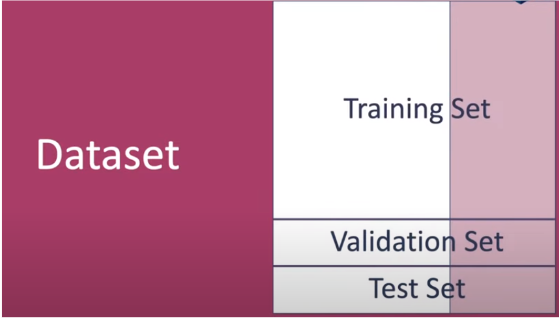

# Линейная регрессия

**Регрессия** — это одна из трех базовых задач машинного обучения (классификация, регрессия, кластеризация).



Определение. Задача предсказания значения одной или нескольких целевых переменных (англ. **target variable**) на основе D-мерного вектора х входных переменных (англ. **input variables**) называется задачей регрессии.


В задаче **регрессии** мы используем входные **признаки**, чтобы предсказать **целевые значения**. Например, чтобы предсказать цену жилья по его характеристикам (площадь, этаж, год постройки дома, высота потолков, район, ...). **Линейная регрессия** сводится к тому, чтобы провести “**линию наилучшего соответствия**” через набор точек данных.

## Данные

В линейной простой регрессии данные состоят из пар значений (x, t), где x - это входные переменные (предикторы) или **input variables**, а t - целевая переменная (зависимая переменная) или  **target variable**, которую мы пытаемся предсказать на основе входных данных. Эти данные используются для построения модели линейной регрессии, которая пытается найти линейную зависимость между входными переменными и целевой переменной.

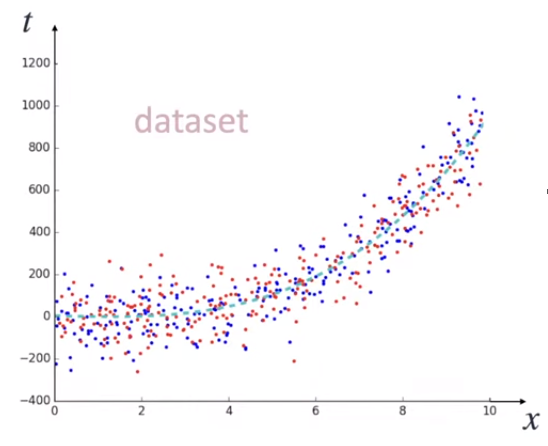

##  Модель и ее параметры

Цель линейной регрессии — **поиск линии, которая наилучшим образом соответствует заданным точкам**. Напомним, что общее уравнение прямой:

$$\large t = w⋅x + b,$$

где $w$ — характеризует наклон линии (в будущем мы будем называть значения $w$ весом, weight) а $b$ — её сдвиг по $y$ (bias). Таким образом, решение линейной регрессии определяет значения для $w$ и $b$ так, что $t$ приближается как можно ближе к $y$. $w$ и $b$ — **параметры модели**.

Отобразим на графике случайные точки, расположенные в окрестности $t = 3⋅x + 2$

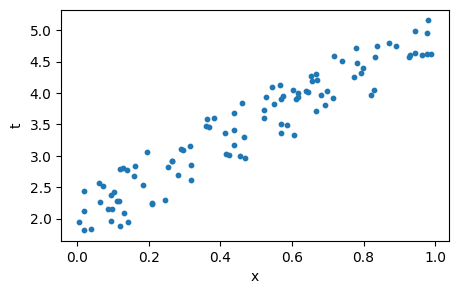

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
x = np.random.rand(100, 1)
t = 2 + 3 * x + (np.random.rand(100, 1) - 0.5)

plt.figure(figsize=(5, 3))
plt.scatter(x, t, s=10)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

Предположим, что нам неизвестны параметры наклона и сдвига $w$ и $b$. Для их определения мы бы могли рассмотреть все возможные прямые вида $t = w⋅x + b$ и выбрать среди семейства прямых такую, которая лучше всего приближает имеющиеся данные:

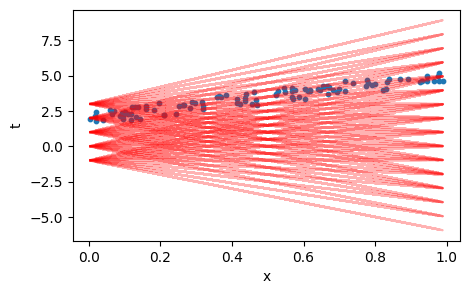

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
for w in np.arange(-5.0, 7.0, 1):
    for b in [-1, 0, 1, 2, 3]:
        t_predicted = b + w * x
        plt.plot(x, t_predicted, color="r", alpha=0.3)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

## Постановка задачи регрессия
Предположим, что значение целевой переменной $t$ для входного векторах определяется значением детерминированной функции $у(х, w)$ с аддитивным Гауссовым шумом $\varepsilon$

$$t = y(x, w) +ɛ,  \quad ɛ \sim Ν(0, σ^2)$$

Тогда
$$p(t|x, w, o²) = N(y(x, w), σ²)$$

Это уравнение описывает модель регрессии, которая предполагает, что целевая переменная $t$ зависит от входного вектора $x$ через детерминированную функцию $y(x, w)$, где $w$ - параметры модели. Однако, так как в реальных данных всегда присутствует некоторый уровень шума или случайной ошибки, в уравнение добавляется Гауссовый шум $\varepsilon$, который имеет нормальное распределение с математическим ожиданием 0 и дисперсией $\sigma^2$.

Итак, уравнение $t = y(x, w) + \varepsilon$ показывает, что значение целевой переменной $t$ равно значению функции $y(x, w)$ плюс случайный шум. Затем, вероятность получить конкретное значение $t$ при заданных $x$, $w$ и $\sigma^2$ описывается нормальным распределением с математическим ожиданием $y(x, w)$ и дисперсией $\sigma^2$.

Это позволяет модели регрессии учитывать случайные ошибки в данных и оценивать вероятностное распределение значений целевой переменной с учетом шума.

Стоить отметить, что в общем случае дисперсия ошибки
$σ^2$  в модели регрессии считается постоянной. Однако, если вы обнаружите, что дисперсия ошибки зависит от значений предиктора $x$, это может указывать на **гетероскедастичность**. В таких случаях можно использовать методы, которые учитывают эту зависимость для более точного моделирования данных.

**Гетероскедастичность** - это статистический термин, который означает наличие неравномерной изменчивости дисперсии ошибок в регрессионной модели. В случае гетероскедастичности дисперсия ошибок не остается постоянной по всем значениям независимой переменной, что может привести к недопустимым выводам при оценке коэффициентов регрессии. Для корректного анализа данных важно учитывать и корректировать гетероскедастичность при построении моделей.

## Построение функции y(x,w)

В задачах регрессии требуется построиь функция вида $$y(x,w) ⟶R$$
где $w-$ вектор параметров функции, $x-$ вектор характеристик.
Вид функции y подбирается заранее. Параметр $w$  вычисляются в результате обучения.

Рассмотрим следующий вид функции y:
$$y(x,w) = w_0+w_1 x_1 + \ldots + w_D x_D=w_0+\sum_{i=1}^D w_i\cdot x_i$$

где
$y(x,w)$– целевая переменная (таргет), $x=(x_1, \ldots, x_D)-$   вектор, соответствующий объекту выборки (вектор признаков), а $w_1, \ldots, w_D, w_0$
 – параметры модели. Признаки ещё называют фичами (от английского features). Вектор $w = (w_1,\ldots,w_D)$
 часто называют вектором весов, так как на предсказание модели можно смотреть как на взвешенную сумму признаков объекта, а число $w_0-$
  свободным коэффициентом, или сдвигом (bias).


**Замечание.** *Чтобы применять линейную модель, нужно, чтобы каждый объект уже был представлен вектором численных признаков $x_1, \ldots, x_D$
. Конечно, просто текст или граф в линейную модель не положить, придётся сначала придумать для него численные фичи. Модель называют линейной, если она является линейной по этим численным признакам.*


**Вопрос на подумать.** А как быть, если одна из фичей является категориальной, то есть принимает значения из (обычно конечного числа) значений, не являющихся числами? Например, это может быть время года, уровень образования, марка машины и так далее. Как правило, с такими значениями невозможно производить арифметические операции или же результаты их применения не имеют смысла.

### Ответ.
В линейную модель можно подать только численные признаки, так что категориальную фичу придётся как-то закодировать. Рассмотрим для примера вот такой датасет.



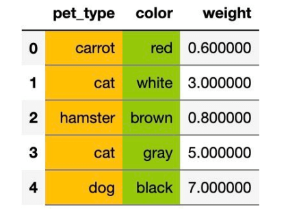

Здесь два категориальных признака – **pet_type** и **color**. Первый принимает четыре различных значения, второй – пять.

Самый простой способ – использовать one-hot кодирование (one-hot encoding). Пусть исходный признак мог принимать M
 значений $c_1,\ldots, c_M.$ Давайте заменим категориальный признак на M
 признаков, которые принимают значения
0 и 1:$i$-й будет отвечать на вопрос «принимает ли признак значение
$c_i$?». Иными словами, вместо ячейки со значением $c_i$
 у объекта появляется строка нулей и единиц, в которой единица стоит только на
$i$-м месте.

В нашем примере получится вот такая табличка:

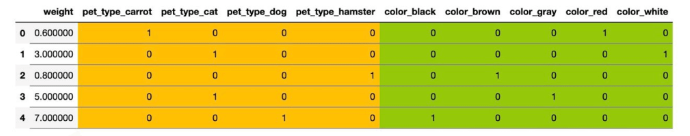

Можно было бы на этом остановиться, но добавленные признаки обладают одним неприятным свойством: в каждом из них ровно одна единица, так что сумма соответствующих столбцов равна столбцу из единиц. А это уже плохо. Представьте, что у нас есть линейная модель:
$$y \sim w_1x_1 + \ldots + w_{D-1}x_{d-1} + w_{c_1}x_{c_1} + \ldots + w_{c_M}x_{c_M} + w_0$$

Преобразуем немного правую часть:
$$y\sim w_1x_1 + \ldots + w_{D-1}x_{d-1} + \underbrace{(w_{c_1} - w_{c_M})}_{=:w'_{c_1}}x_{c_1} + \ldots + \underbrace{(w_{c_{M-1}} - w_{c_M})}_{=:w'_{C_{M-1}}}x_{c_{M-1}} + w_{c_M}\underbrace{(x_{c_1} + \ldots + x_{c_M})}_{=1} + w_0 = w_1x_1 + \ldots + w_{D-1}x_{d-1} + w'_{c_1}x_{c_1} + \ldots + w'_{c_{M-1}}x_{c_{M-1}} + \underbrace{(w_{c_M} + w_0)}_{=w'_{0}}$$

Как видим, от одного из новых признаков можно избавиться, не меняя модель. Больше того, это стоит сделать, потому что наличие «лишних» признаков ведёт к переобучению или вовсе ломает модель – подробнее об этом мы поговорим в разделе про регуляризацию. Поэтому при использовании one-hot-encoding обычно выкидывают признак, соответствующий одному из значений. Например, в нашем примере итоговая матрица объекты-признаки будет иметь вид:

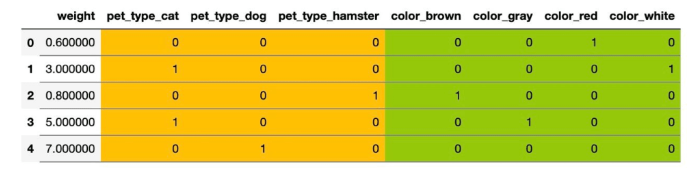

## Базисные функции (Basis Function)

Базисные функции в линейной регрессии представляют собой функции, которые используются для преобразования исходных признаков (например, входных переменных) в новое пространство признаков. Они помогают модели линейной регрессии адаптироваться к сложным нелинейным зависимостям между входными данными и целевой переменной. Базисные функции могут быть полиномиальными, тригонометрическими, экспоненциальными и т. д. Они позволяют модели лучше соответствовать данным путем создания новых признаковых комбинаций, которые могут быть более подходящими для описания сложных взаимосвязей в данных.

Интерес  представляет более широкой класс моделей:

$$y(x,w) = w_0+\sum_{j=1}^{M-1} w_j\cdot \phi_j(x)=w^T\phi(x)$$

где $$\phi(x)=(ϕ_0(x), ϕ_1(x), ..., ϕ_M-1(x))^T, \quad  \phi_0(x)=1$$

$$w=(w_0,w1, ..., w_{M-1})^T$$


Введение базисных функций в модель линейной регрессии может быть необходимо по нескольким причинам:

1. **Моделирование сложных зависимостей:** Базисные функции позволяют моделировать сложные нелинейные зависимости между входными признаками и целевой переменной, что делает модель более гибкой и способной адаптироваться к разнообразным данным.

2. **Улучшение предсказательной способности:** Путем использования базисных функций можно улучшить способность модели лучше соответствовать данным и делать более точные прогнозы.

3. **Уменьшение ошибки модели:** Введение подходящих базисных функций может помочь уменьшить ошибку модели, улучшив ее способность описывать данные.

4. **Обобщение модели:** Базисные функции позволяют модели лучше обобщать на новые данные, даже если зависимости в данных не являются линейными.

Таким образом, введение базисных функций в линейную регрессионную модель может быть необходимым для улучшения ее способности адаптироваться к различным типам данных и делать точные прогнозы.

Приведем несколько примеров базисных функций, которые могут использоваться в линейной регрессии:

1. **Полиномиальные базисные функции:**
   Полиномиальные базисные функции могут быть использованы для моделирования нелинейных зависимостей.
   Пример:
   $$ \phi(x) = (1, x, x^2, x^3, \ldots) $$

2. **Радиально-базисные функции (RBF):**
   Радиально-базисные функции могут быть полезны для аппроксимации сложных нелинейных зависимостей.
   Пример:
   $$ \phi(x) = (e^{-\frac{(x - \mu_1)^2}{2\sigma^2}}, e^{-\frac{(x - \mu_2)^2}{2\sigma^2}}, \ldots) $$

3. **Синусоидальные базисные функции:**
   Синусоидальные базисные функции могут быть полезны для анализа периодических данных.
   Пример:
   $$ \phi(x) = (\sin(\omega_1 x), \cos(\omega_1 x), \sin(\omega_2 x), \cos(\omega_2 x), \ldots) $$

Это лишь некоторые примеры базисных функций, которые могут быть использованы в линейной регрессии для моделирования различных типов зависимостей в данных.

Давайте рассмотрим два варианта модификации модели линейной регрессии с использованием базисных функций:

**Линейная регрессия:**
В случае линейной регрессии с базисными функциями, модель остается линейной относительно параметров w, но базисные функции позволяют учесть нелинейные зависимости между признаками и целевой переменной.
$$\phi_1(x)=x_1, \phi_2(x)=x_2, ..., \phi_D(x)=x_D. $$

**Полиномиальная регрессия с одной переменной:**
Полиномиальная регрессия с одной переменной представляет собой модификацию линейной регрессии, где в качестве базисных функций используются степени исходной переменной.
$$\phi_1(x)=x, \phi_2(x)=x^2, ..., \phi_K(x)=x^K. $$



Для лучшего понимания давайте рассмотрим еще один вариант уравнения полиномиальной регрессии с одной переменной (второй степени) с использованием базисных функций
 $ \phi $:

$$ y(x, w) = w_0 + w_1 \cdot \phi_1(x) + w_2 \cdot \phi_2(x) $$

В данном контексте $\phi$ представляет собой вектор базисных функций, который преобразует исходную переменную $x$ в новое пространство признаков. В случае полиномиальной регрессии с одной переменной (второй степени), базисные функции $\phi$ включают в себя константу, саму переменную $x$ и квадрат переменной $x^2$. Таким образом, $\phi(x) = (1, x, x^2)$ в данном случае.

## Матрица плана (Desifn Matrix)

Матрица плана (Design Matrix) в линейной регрессии представляет собой матрицу, которая содержит значения всех независимых переменных (факторов) модели. Каждая строка матрицы соответствует одному наблюдению, а каждый столбец представляет собой один из факторов или базисную функцию.

Обычно матрица плана обозначается как $ X $ и имеет размерность $ n \times (p+1) $, где $ n $ - количество наблюдений, $ p $ - количество факторов (включая константу).

Формально, матрица плана выглядит следующим образом:
$$ X = \begin{bmatrix} 1 & x_{11} & x_{12} & \ldots & x_{1p} \\ 1 & x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & x_{n2} & \ldots & x_{np} \end{bmatrix} $$

Здесь первый столбец - это столбец констант (bias term), а остальные столбцы представляют значения факторов или базисных функций для каждого наблюдения. Матрица плана используется для оценки параметров модели линейной регрессии с помощью метода наименьших квадратов.

Матрица плана (Design Matrix) в линейной регрессии используется для оценки параметров модели. Она необходима для формализации связи между независимыми переменными и зависимой переменной в модели линейной регрессии. Вот несколько причин, почему матрица плана важна:

1. **Оценка параметров:** С помощью матрицы плана можно оценить параметры модели (веса) с использованием метода наименьших квадратов, который минимизирует сумму квадратов разностей между наблюдаемыми значениями и предсказаниями модели.

2. **Учет множественных факторов:** Матрица плана позволяет учитывать влияние нескольких независимых переменных на зависимую переменную, что делает модель более гибкой и способной описывать сложные взаимосвязи.

3. **Проверка статистической значимости:** С помощью матрицы плана можно проводить статистические тесты на значимость коэффициентов модели и оценивать статистическую значимость влияния факторов на зависимую переменную.

Таким образом, матрица плана играет ключевую роль в построении и анализе модели линейной регрессии, помогая оценить параметры модели и интерпретировать влияние факторов на целевую переменную.

Матрица плана (Design Matrix) с учетом базисных функций в линейной регрессии представляет собой матрицу, в которой каждый столбец соответствует базисной функции или фактору, используемому для моделирования зависимости между независимыми переменными и целевой переменной.

При использовании базисных функций, матрица плана выглядит следующим образом:
$$ Φ= \begin{bmatrix} \phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & \ldots & \phi_p(x_1) \\ \phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & \ldots & \phi_p(x_2) \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ \phi_0(x_n) & \phi_1(x_n) & \phi_2(x_n) & \ldots & \phi_p(x_n) \end{bmatrix} $$

Здесь каждая строка представляет одно наблюдение, а столбцы соответствуют базисным функциям, примененным к соответствующим независимым переменным $ x_i $.

Матрица плана с учетом базисных функций играет важную роль в моделировании сложных зависимостей, позволяя учесть нелинейные взаимосвязи между переменными и строить более гибкие модели линейной регрессии.

Давайте рассмотрим конкретный пример линейной регрессии с использованием матрицы плана.

Предположим, у нас есть следующий набор данных с двумя независимыми переменными $ x_1 $ и $ x_2 $ и зависимой переменной $ y $:

| \( x_1 \) | \( x_2 \) | \( y \) |
|----------|----------|-------|
|   1      |   2      |  3    |
|   2      |   3      |  5    |
|   3      |   4      |  7    |

Мы будем использовать линейную модель с уравнением:
$$ y = w_0 + w_1x_1 + w_2x_2$$

Теперь давайте построим матрицу плана \( X \) и найдем параметры \( w \):

Матрица плана:
$$ X = \begin{bmatrix} 1 & 1 & 2 \\ 1 & 2 & 3 \\ 1 & 3 & 4 \end{bmatrix} $$

Вектор параметров:
$$ w = (w_0, w_1, w_2)^T $$

Модель может быть представлена в матричной форме как:
$$ Y = Xw + \varepsilon $$

Где:
- $ Y = (3, 5, 7)^T $ - вектор наблюдаемых значений,
- $ \varepsilon $ представляет ошибку.

По позьже приведем конкретный пример.

## Функция правдоподобия (Likehood)

Функция правдоподобия (Likelihood) в линейной регрессии используется для оценки того, насколько вероятно наблюдать имеющиеся данные при определенных значениях параметров модели. В линейной регрессии обычно предполагается, что остатки распределены нормально.

Для простоты, предположим, что наблюдения $ t_i $ имеют нормальное распределение с математическим ожиданием $ y(x, w)$ и дисперсией $ \sigma^2 $. Тогда функция правдоподобия для одного наблюдения будет иметь вид функции плотности вероятности нормального распределения:
$$ L(y_i | x_i, w) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(t_i - y(x_i, w))^2}{2\sigma^2}} $$

Полная функция правдоподобия для всех наблюдений в выборке будет произведением функций правдоподобия для каждого наблюдения:
$$ L(y | X, w) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(t_i - y(x_i, w))^2}{2\sigma^2}} $$



Принцип максимального правдоподобия (Maximum Likelihood) в линейной регрессии заключается в поиске таких значений параметров $w$, при которых вероятность получить имеющиеся наблюдения $t$ будет максимальной, учитывая предположения о нормальном распределении ошибок.

В линейной регрессии предполагается, что ошибки имеют нормальное распределение со средним значением, равным 0, и дисперсией $\sigma^2 $. При добавлении значения $y(x, w)$ к нормальному распределению, оно сдвигается на это значение влево или вправо. Таким образом, переменная $t = y(x, w) + \varepsilon$ имеет такое же нормальное распределение.

Это означает, что $ t$ имеет нормальное распределение с математическим ожиданием $ y(x, w)$ и дисперсией $ \sigma^2$:
$$ t \rightarrow N(y(x, w), \sigma^2)$$

Этот принцип позволяет нам оценить параметры модели линейной регрессии, максимизируя вероятность получить имеющиеся наблюдения при определенных значениях параметров $ w $.


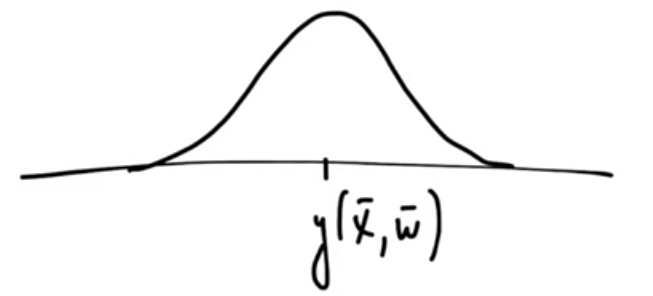

С учетом базисной функции, функция правдоподобия в более общем виде для линейной регрессии может быть записана следующим образом:

$$p(t|X,w, \sigma^2) = \prod_{i=1}^{N} N(t_i|w^T \phi(x_i), \sigma^2) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-\frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}} $$

Эта функция правдоподобия представляет вероятность наблюдать значения целевой переменной $ t=(t_1, t_2, ...,t_N)^T $ при условии матрицы плана $ X=\{x_1, x2,...,x_n\} $, параметров $ w $ и дисперсии $ \sigma^2 $ в контексте линейной регрессии с базисными функциями. Она является произведением нормальных распределений для каждого наблюдения, где среднее значение задано как $ w^T \phi(x_i) $, а дисперсия равна $ \sigma^2 $.


Для нахождения целевой функции, которую нужно максимизировать для оценки параметров модели линейной регрессии с базисными функциями, мы берем логарифм от функции правдоподобия по нескольким причинам:

1. **Упрощение умножения в суммирование:** Логарифм позволяет преобразовать произведение вероятностей в сумму логарифмов, что упрощает вычисления и предотвращает потерю точности при работе с малыми вероятностями.

2. **Удобство оптимизации:** Логарифмическая функция правдоподобия обычно имеет более гладкую форму и легче оптимизируется, так как минимизация логарифмической функции равносильна максимизации исходной функции правдоподобия.

3. **Интерпретация:** Логарифмирование не изменяет максимум функции правдоподобия, поэтому максимизация логарифма дает те же оценки параметров, что и максимизация исходной функции правдоподобия.

## Вычисление параметров модели (Model parameters estimations)

Для вычисления параметров модели в линейной регрессии с использованием метода максимального правдоподобия и функции правдоподобия, нам нужно:

Логарифмическая функция правдоподобия:

$$ln( p(t|X,w, \sigma^2))=ln(\prod_{i=1}^{N} \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-\frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}}) $$

С учетом правило логираифмирование $ln(a⋅b)=lna+lnb$ получим:

$$ln (p(t|X,w, \sigma^2))=ln(\prod_{i=1}^{N} \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-\frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}})=\sum_{i=1}^{N} \left[\ln\left(\frac{1}{\sqrt{2\pi \sigma^2}}\right) - \frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}\right]=\sum_{i=1}^{N} \left[\ln\left(\frac{1}{\sqrt{2\pi \sigma^2}}\right)\right] -\sum_{i=1}^{N} \left[\frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}\right]= N \cdot  ln \frac{1}{\sqrt{2 \pi  σ^2}}-\frac{1}{σ^2} ⋅ \frac{1}{2} \cdot \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2=-\frac{N}{2}\cdot ln(2\pi σ^2)-\frac{1}{σ^2} ⋅ \frac{1}{2} \cdot \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2$$





**Замечание.** Из курса математического анализа известно, что $$ \underset{x}{\text{argmax}} \ln f(x) = \underset{x}{\text{argmax}} f(x). $$ Это означает, что точка, в которой функция $f(x)$ достигает максимума, совпадает с точкой, в которой логарифм от функции $f(x)$ достигает максимума. Это связано с тем, что логарифм — монотонно возрастающая функция, поэтому максимумы обеих функций совпадают.

Таким образом, при поиске точки максимума функции $ f(x)$, можно вместо этого искать максимум логарифма от $ f(x)$, что может быть полезно для упрощения вычислений или оптимизации.

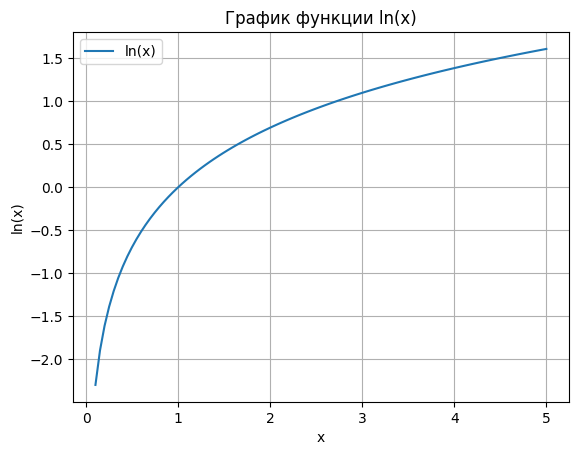

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем значения x от 0.1 до 5 с шагом 0.1
x = np.linspace(0.1, 5, 100)
y = np.log(x)  # Вычисляем значения ln(x)

# Строим график
plt.figure()
plt.plot(x, y, label='ln(x)')
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.title('График функции ln(x)')
plt.grid(True)
plt.legend()
plt.show()

В итоге получим:
$$ln (p(t|X,w, \sigma^2))= \sum_{i=1}^{N} ln N(w^Tϕ(x_i), σ^2)= -\frac{N}{2}\cdot ln(2\pi σ^2)-\frac{1}{σ^2}\cdot E(w), $$
где
$$E(w)=\frac{1}{2} \cdot \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2$$

## Вспомогательные сведения

### Умножение двух векторов-столбцов (векторов-столбцов)

Для умножения двух векторов-столбцов (векторов-столбцов) необходимо использовать операцию умножения матриц. При умножении двух векторов-столбцов $A$ и $B$, где $A$ имеет размерность $m \times 1$ и $B$ имеет размерность $ n \times 1 $, результат будет матрица размерности $ m \times n$.

Умножение векторов-столбцов происходит путем умножения каждого элемента одного вектора на соответствующий элемент другого вектора и последующим сложением этих произведений.

Допустим, у нас есть вектор-столбец $ A = \begin{bmatrix} a_1 \\ a_2 \\ \vdots \\ a_m \end{bmatrix}$ и вектор-столбец $B = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{bmatrix}$. Результат их умножения будет матрица $$C = AB^T,$$ где $$C_{ij} = a_i \cdot b_j$$.


Давайте рассмотрим пример умножения двух векторов-столбцов:

Пусть у нас есть два вектора-столбца:
$ A = \begin{bmatrix} 2 \\ 3 \\ 1 \end{bmatrix} $ и
$ B = \begin{bmatrix} 4 \\ 1 \\ 5 \end{bmatrix} $

Для умножения этих двух векторов мы умножаем каждый элемент одного вектора на соответствующий элемент другого вектора и суммируем результаты.

Умножение:
$ C = A \cdot B^T = \begin{bmatrix} 2 \\ 3 \\ 1 \end{bmatrix} \cdot \begin{bmatrix} 4 & 1 & 5 \end{bmatrix} $

$$ C = \begin{bmatrix} 2 \\ 3 \\ 1 \end{bmatrix} \cdot \begin{bmatrix} 4 \\ 1 \\ 5 \end{bmatrix} = (2 \cdot 4) + (3 \cdot 1) + (1 \cdot 5) = 8 + 3 + 5 = 16 $$

Таким образом, результат умножения векторов-столбцов $A$ и $B$ равен 16.






### Математическое ожидание и дисперсия

Математическое ожидание и дисперсия - это две важные характеристики случайной величины в теории вероятностей и математической статистике.

**Математическое ожидание случайной величины** - это среднее значение, которое можно ожидать в результате многократного повторения случайного эксперимента. Оно обозначается как E(X) или μ и вычисляется как сумма произведений значений случайной величины на их вероятности.

$$ E(X) = \sum_{x} x \cdot P(x) $$

Где:
- $x$ - значения случайной величины,
- $P(x)$ - вероятность появления значения $x$.



**Дисперсия случайной величины** - это мера разброса значений случайной величины относительно её математического ожидания. Она показывает, насколько значения случайной величины отклоняются от её среднего значения. Дисперсия обозначается как $Var(X)$ или $σ^2$ и вычисляется как среднее значение квадратов отклонений значений случайной величины от её математического ожидания.

$$ Var(X) = E((X - \mu)^2)$$

Где:
- $\mu$ - математическое ожидание случайной величины  $X$.


Эти понятия широко используются в статистике для анализа данных и принятия решений на основе вероятностных моделей.


Пример 1. Предположим, у нас есть случайная величина $X$, которая может принимать значения 2, 4 и 6 с вероятностями 0.3, 0.4 и 0.3 соответственно.

Чтобы найти математическое ожидание:
$$E(X) = 2*0.3 + 4*0.4 + 6*0.3 = 1.2 + 1.6 + 1.8 = 4.6$$

Теперь, чтобы найти дисперсию, нам нужно сначала найти математическое ожидание:
$μ = 4.6$

Затем используем формулу для дисперсии:
$$Var(X) =  (2-4.6)^2 * 0.3 + (4-4.6)^2 * 0.4 + (6-4.6)^2 * 0.3=6.76 * 0.3 + 0.36 * 0.4 + 1.96 * 0.3=2.028 + 0.144 + 0.588= 2.76$$

Таким образом, математическое ожидание $E(X)$ для данной случайной величины равно 4.6, а дисперсия $Var(X)$ равна 2.76.


Пример 2. Рассмотрим пример с подбрасыванием обычного шестигранного кубика.

**1. Математическое ожидание:**

При подбрасывании обычного шестигранного кубика, каждое из шести чисел от 1 до 6 имеет одинаковую вероятность выпадения 1/6. Математическое ожидание (среднее значение) для этого случая будет:
$$(1 + 2 + 3 + 4 + 5 + 6) / 6 = 3.5$$

**2. Дисперсия:**

Дисперсия измеряет, насколько значения случайной величины разбросаны от её среднего значения. Для подбрасывания шестигранного кубика дисперсия будет:
$$((1-3.5)^2 + (2-3.5)^2 + (3-3.5)^2 + (4-3.5)^2 + (5-3.5)^2 + (6-3.5)^2) / 6 = 2.92$$

Таким образом, в нашем примере математическое ожидание равно 3.5, а дисперсия равна 2.92 для подбрасывания обычного шестигранного кубика.

### Гауссовское распределение (нормальное распределение)

Гауссовское распределение (нормальное распределение) - это одно из наиболее широко используемых распределений вероятностей в статистике и теории вероятностей. Оно характеризуется колоколообразной кривой и имеет следующие основные характеристики:

* Симметричность: График нормального распределения симметричен относительно своего среднего значения.
* Однозначное пиковое значение: Максимальное значение плотности вероятности находится вокруг среднего значения.
* Определенный разброс: Разброс значений вокруг среднего значения определяется стандартным отклонением.

Гауссовское распределение широко используется для моделирования различных явлений в природе и обществе, а также во многих областях науки, техники и финансов.

**Задача:** Исследование вероятности того, что рост случайно выбранного человека из генеральной совокупности, распределенного нормально с средним значением 170 см и стандартным отклонением 10 см, будет находиться в диапазоне от 160 до 180 см.

Для решения этой задачи мы можем воспользоваться правилом трех сигм для нормального распределения.

1. Найдем z-значения для 160 см и 180 см:
   $$z_1 = \frac{160 - 170}{10} = -1$$
   $$z_2 = \frac{180 - 170}{10} = 1$$

2. Теперь найдем вероятность $P(160 < X < 180)$ используя таблицу стандартного нормального распределения:
   $$ P(-1 < Z < 1) = P(Z < 1) - P(Z < -1)$$
  
  $$ P(-1 < Z < 1) = 0.8413 - 0.1587 = 0.6826 $$

Таким образом, вероятность того, что рост случайно выбранного человека будет находиться в диапазоне от 160 до 180 см, составляет примерно 68.26%.

Вероятность: 0.6827


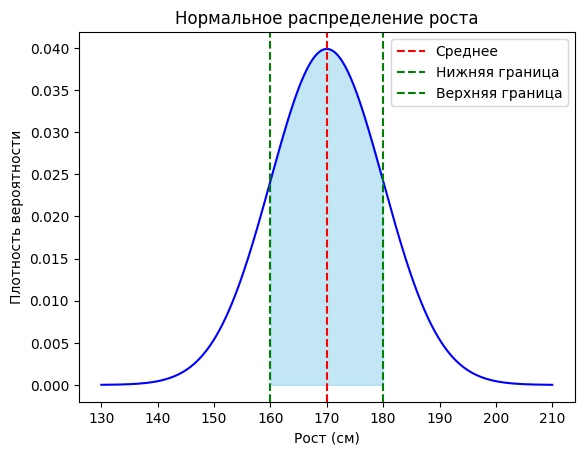

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Заданные параметры
mean = 170
std_dev = 10
lower_bound = 160
upper_bound = 180

# Вычисление z-значений
z_lower = (lower_bound - mean) / std_dev
z_upper = (upper_bound - mean) / std_dev

# Вычисление вероятности
probability = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

print(f"Вероятность: {probability:.4f}")

# Построение графика
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, y, color='b')
plt.fill_between(x, y, where=(x >= lower_bound) & (x <= upper_bound), color='skyblue', alpha=0.5)
plt.title('Нормальное распределение роста')
plt.xlabel('Рост (см)')
plt.ylabel('Плотность вероятности')
plt.axvline(mean, color='r', linestyle='--', label='Среднее')
plt.axvline(lower_bound, color='g', linestyle='--', label='Нижняя граница')
plt.axvline(upper_bound, color='g', linestyle='--', label='Верхняя граница')
plt.legend()
plt.show()

### Действия с матрицами

[Действия с матрицами](http://mathprofi.ru/deistviya_s_matricami.html)

### Линейная зависимая и независимая векторов

[Линейная зависимость и линейная независимость векторов.](http://mathprofi.ru/linejnaja_nezavisimost_vektorov_bazis_vektorov.html)

### Собственные значения и собственные векторы матрицы

[Собственные значения и собственные векторы матрицы](http://mathprofi.ru/sobstvennye_znachenija_i_sobstvennye_vektory.html)